In [11]:
pip install -q mediapipe==0.10.0

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install protobuf==3.20.*

Note: you may need to restart the kernel to use updated packages.


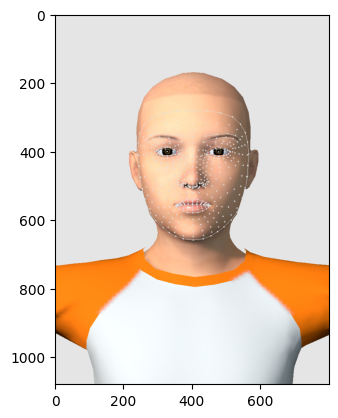

In [1]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

# 얼굴 검출을 위한 객체
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    refine_landmarks=True,
    static_image_mode=True,
    max_num_faces=3,
)
# Face Mesh를 그리기 위한 객체
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

# 이미지 읽기
image = cv2.imread("./dataset/test/img/0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# 얼굴 검출
results = face_mesh.process(image)

# Face Mesh 그리기
for single_face_landmarks in results.multi_face_landmarks:
    mp_drawing.draw_landmarks(
        image=image,
        landmark_list=single_face_landmarks,
        connections=mp_face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec,
    )

plt.imshow(image)
plt.show()

In [2]:
import numpy as np
import pandas as pd

In [3]:
for i in range(100):
    # 이미지 읽기
    image = cv2.imread("./dataset/test/img/%s.png"%i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # 얼굴 검출
    results = face_mesh.process(image)

    # Face Mesh 그리기
    for single_face_landmarks in results.multi_face_landmarks:
        mp_drawing.draw_landmarks(
            image=image,
            landmark_list=single_face_landmarks,
            connections=mp_face_mesh.FACEMESH_CONTOURS,
            landmark_drawing_spec=drawing_spec,
            connection_drawing_spec=drawing_spec,
        )
        
    globals()['face_mesh'+str(i)] = np.zeros((468,3))
    
    for simgle_face_landmarks in results.multi_face_landmarks:
        for j in range(468):
            coordinates = simgle_face_landmarks.landmark[j]
            globals()['face_mesh'+str(i)][j][0] = coordinates.x
            globals()['face_mesh'+str(i)][j][1] = coordinates.y
            globals()['face_mesh'+str(i)][j][2] = coordinates.z

    globals()['face_mesh'+str(i)] = pd.DataFrame(globals()['face_mesh'+str(i)])

In [4]:
for i in range(100):
    globals()['face_mesh'+str(i)].to_csv('./face_mesh2(test ver)/%s.csv'%i,index=False)

In [7]:
face_mesh0

,0,1,2
0,0.501790,0.503700,-0.044658
1,0.502543,0.460073,-0.092184
2,0.502946,0.471821,-0.045210
3,0.487497,0.414402,-0.072678
4,0.502369,0.446367,-0.099402
...,...,...,...
463,0.546396,0.378499,0.003798
464,0.537204,0.381872,-0.006474
465,0.531343,0.384766,-0.018570
466,0.636263,0.370540,0.012218
